# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [ ]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [ ]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 0., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

In [ ]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

In [ ]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

In [ ]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

In [ ]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [ ]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [ ]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

## Check the Version of TensorFlow and Access to GPU

This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [ ]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

In [ ]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

## Train Agent on Pendulum Task
Use Pendulum task from OpenAI gym.

In [1]:
import matplotlib.pyplot as plt

# you must include '%matplotlib notebook' for this to work
##%matplotlib notebook

time_limit = 100
y1_lower = -50
y1_upper = 0
y2_lower = -1
y2_upper = 1

# generate plot function
def plt_dynamic(fig, sub1, sub2, x, y1, y2, color_y1='g', color_y2='b'):
   sub1.plot(x, y1, color_y1)
   sub2.plot(x, y2, color_y2)
   fig.canvas.draw()

def plt_clear(fig):
    fig.clear()

def plt_init():
    # create plots
    fig, sub1= plt.subplots(1,1)
    sub2 = sub1.twinx()

    # set plot boundaries
    sub1.set_xlim(0, time_limit) # this is typically time
    sub1.set_ylim(y1_lower, y1_upper) # limits to your y1
    sub2.set_xlim(0, time_limit) # time, again
    sub2.set_ylim(y2_lower, y2_upper) # limits to your y2

    # set labels and colors for the axes
    sub1.set_xlabel('time (s)', color='k') 
    sub1.set_ylabel('y1-axis label', color='g')
    sub1.tick_params(axis='x', colors='k')
    sub1.tick_params(axis='y', colors="g")

    sub2.set_ylabel('y2-axis label', color='b') 
    sub2.tick_params(axis='y', colors='b')
    
    return fig, sub1, sub2
    

Using TensorFlow backend.


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Episode =    1, total reward = -1936.702
Episode =    2, total reward = -1958.819
Episode =    3, total reward = -2314.521
Episode =    4, total reward = -2086.663
Episode =    5, total reward = -2601.449
Episode =    6, total reward = -2476.677
Episode =    7, total reward = -2347.741
Episode =    8, total reward = -2384.948
Episode =    9, total reward = -2263.010
Episode =   10, total reward = -2250.894
Episode =   11, total reward = -2412.730
Episode =   12, total reward = -2470.588
Episode =   13, total reward = -2187.085
Episode =   14, total reward = -2433.701
Episode =   15, total reward = -2331.034
Episode =   16, total reward = -2382.108
Episode =   17, total reward = -2456.321
Episode =   18, total reward = -2294.432
Episode =   19, total reward = -2360.095
Episode =   20, total r

<IPython.core.display.Javascript object>


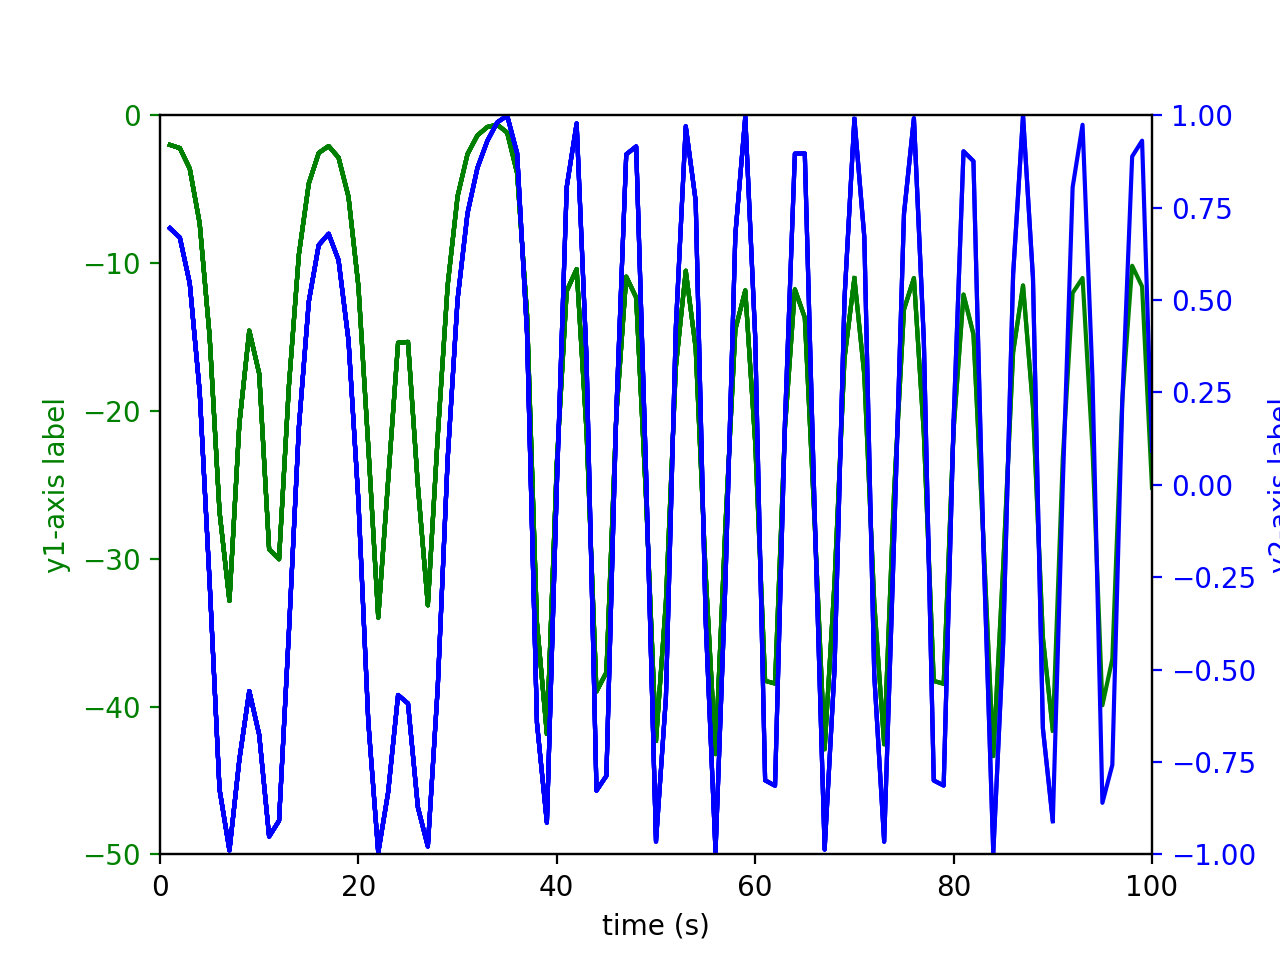

Episode =   50, total reward = -2073.050
Episode =   51, total reward = -2458.680
Episode =   52, total reward = -2412.092
Episode =   53, total reward = -2492.598
Episode =   54, total reward = -2186.196
Episode =   55, total reward = -2300.369
Episode =   56, total reward = -2080.837
Episode =   57, total reward = -1886.748
Episode =   58, total reward = -2434.167
Episode =   59, total reward = -2471.156
Episode =   60, total reward = -2313.852
Episode =   61, total reward = -2484.121
Episode =   62, total reward = -1937.707
Episode =   63, total reward = -2219.843
Episode =   64, total reward = -1625.303
Episode =   65, total reward = -1895.239
Episode =   66, total reward = -2386.523
Episode =   67, total reward = -2444.277
Episode =   68, total reward = -2482.179
Episode =   69, total reward = -2293.330
Episode =   70, total reward = -2475.490
Episode =   71, total reward = -2209.194
Episode =   72, total reward = -2479.307
Episode =   73, total reward = -2463.340
Episode =   74, 

<IPython.core.display.Javascript object>


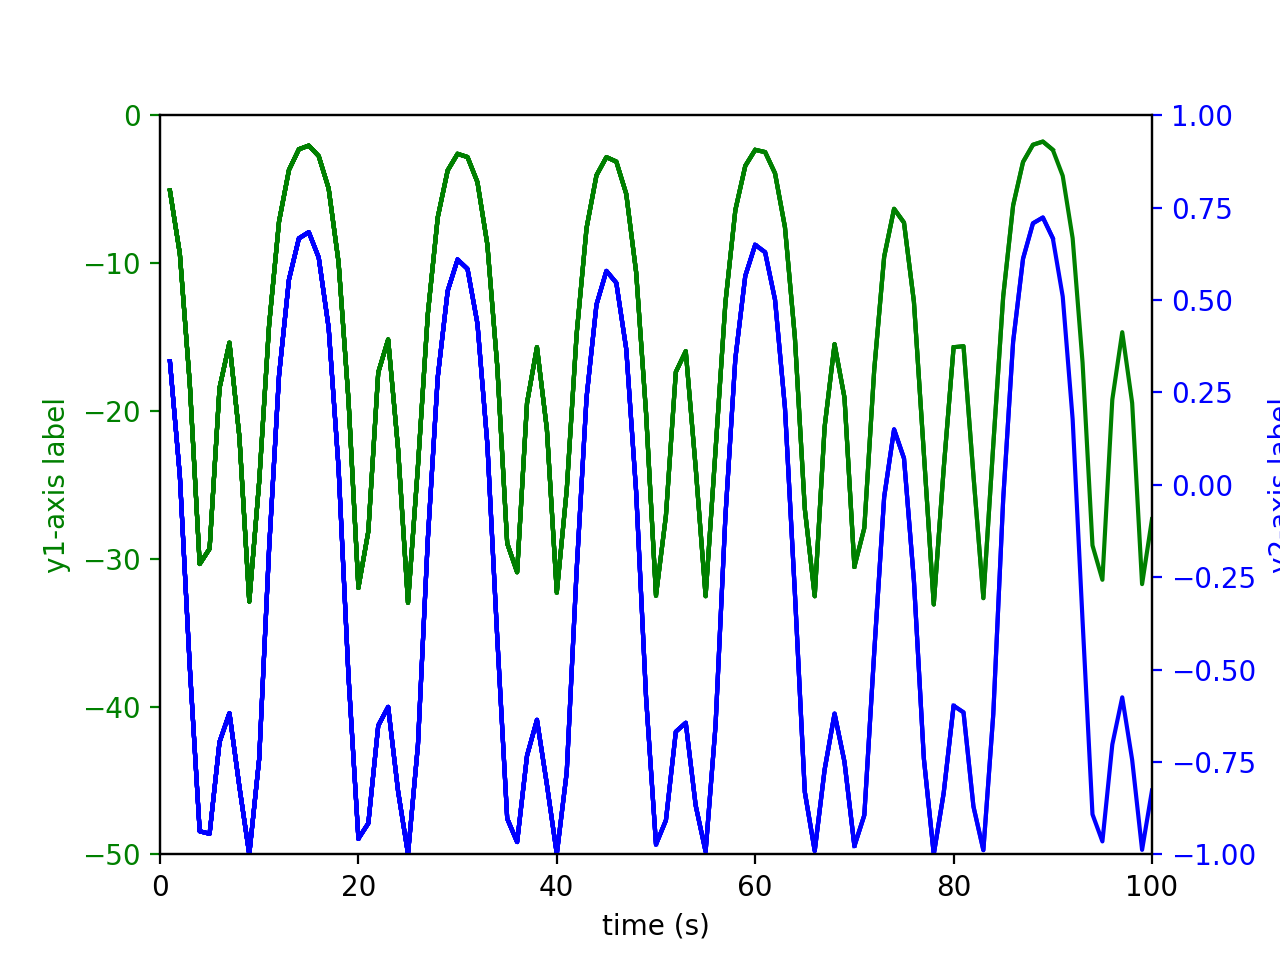

Episode =  100, total reward = -1634.627
Episode =  101, total reward = -2419.709
Episode =  102, total reward = -1950.299
Episode =  103, total reward = -2378.554
Episode =  104, total reward = -2472.296
Episode =  105, total reward = -1902.856
Episode =  106, total reward = -2488.809
Episode =  107, total reward = -2228.484
Episode =  108, total reward = -2407.393
Episode =  109, total reward = -2301.121
Episode =  110, total reward = -2139.657
Episode =  111, total reward = -2330.807
Episode =  112, total reward = -1556.960
Episode =  113, total reward = -2340.530
Episode =  114, total reward = -2343.764
Episode =  115, total reward = -2096.942
Episode =  116, total reward = -2407.707
Episode =  117, total reward = -2476.675
Episode =  118, total reward = -2194.564
Episode =  119, total reward = -2270.949
Episode =  120, total reward = -1892.843
Episode =  121, total reward = -2477.801
Episode =  122, total reward = -2452.937
Episode =  123, total reward = -1693.758
Episode =  124, 

<IPython.core.display.Javascript object>


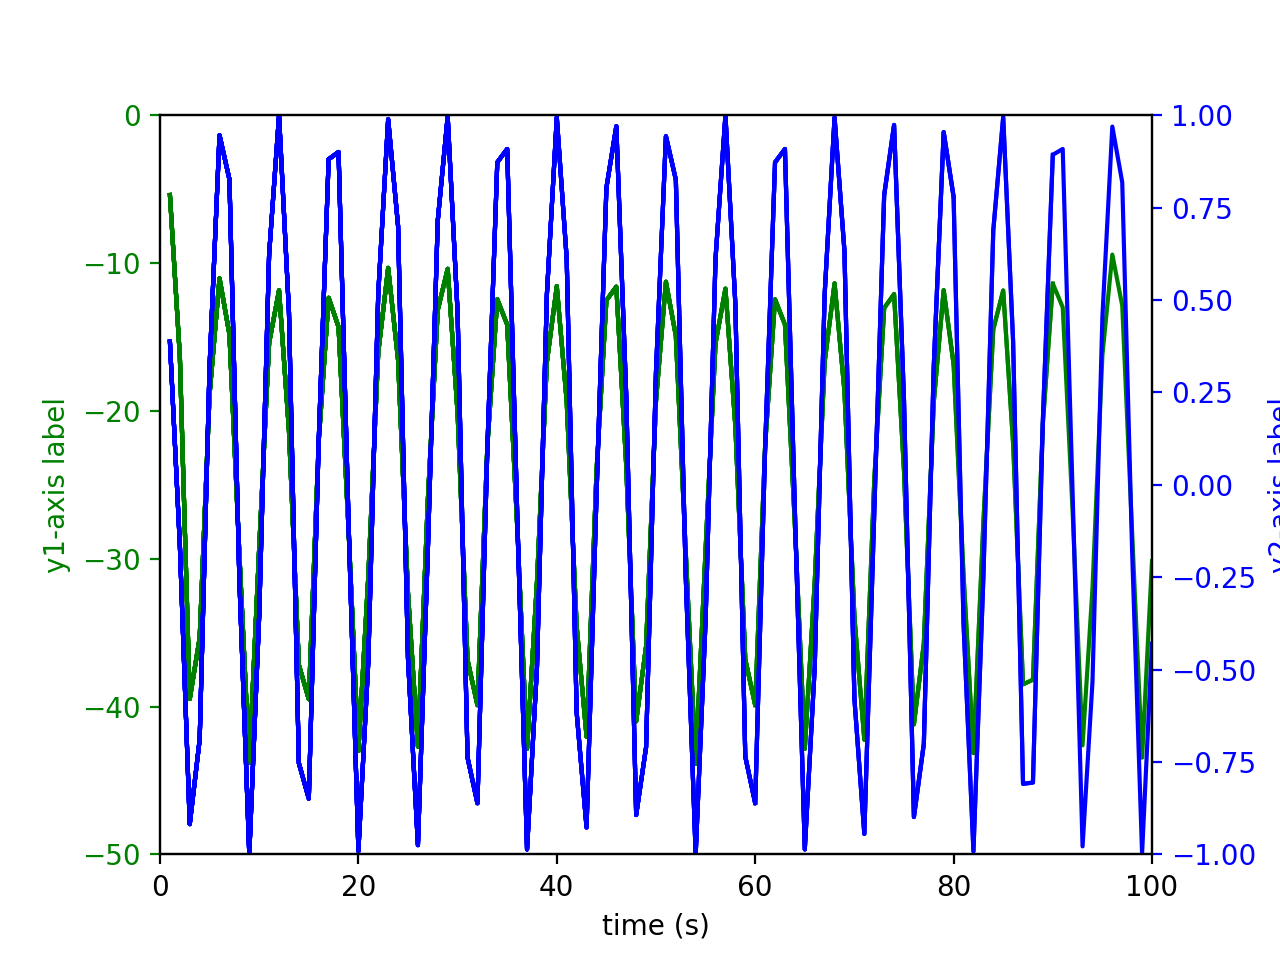

Episode =  150, total reward = -2485.084
Episode =  151, total reward = -1922.343
Episode =  152, total reward = -2472.823
Episode =  153, total reward = -2266.838
Episode =  154, total reward = -2396.308
Episode =  155, total reward = -2173.158
Episode =  156, total reward = -2330.419
Episode =  157, total reward = -2338.893
Episode =  158, total reward = -2034.304
Episode =  159, total reward = -2191.677
Episode =  160, total reward = -2319.106
Episode =  161, total reward = -2375.366
Episode =  162, total reward = -2492.638
Episode =  163, total reward = -2088.973
Episode =  164, total reward = -2492.410
Episode =  165, total reward = -1987.842
Episode =  166, total reward = -2480.877
Episode =  167, total reward = -2491.309
Episode =  168, total reward = -1955.120
Episode =  169, total reward = -2469.278
Episode =  170, total reward = -2490.646
Episode =  171, total reward = -2321.440
Episode =  172, total reward = -2316.953
Episode =  173, total reward = -2148.412
Episode =  174, 

<IPython.core.display.Javascript object>


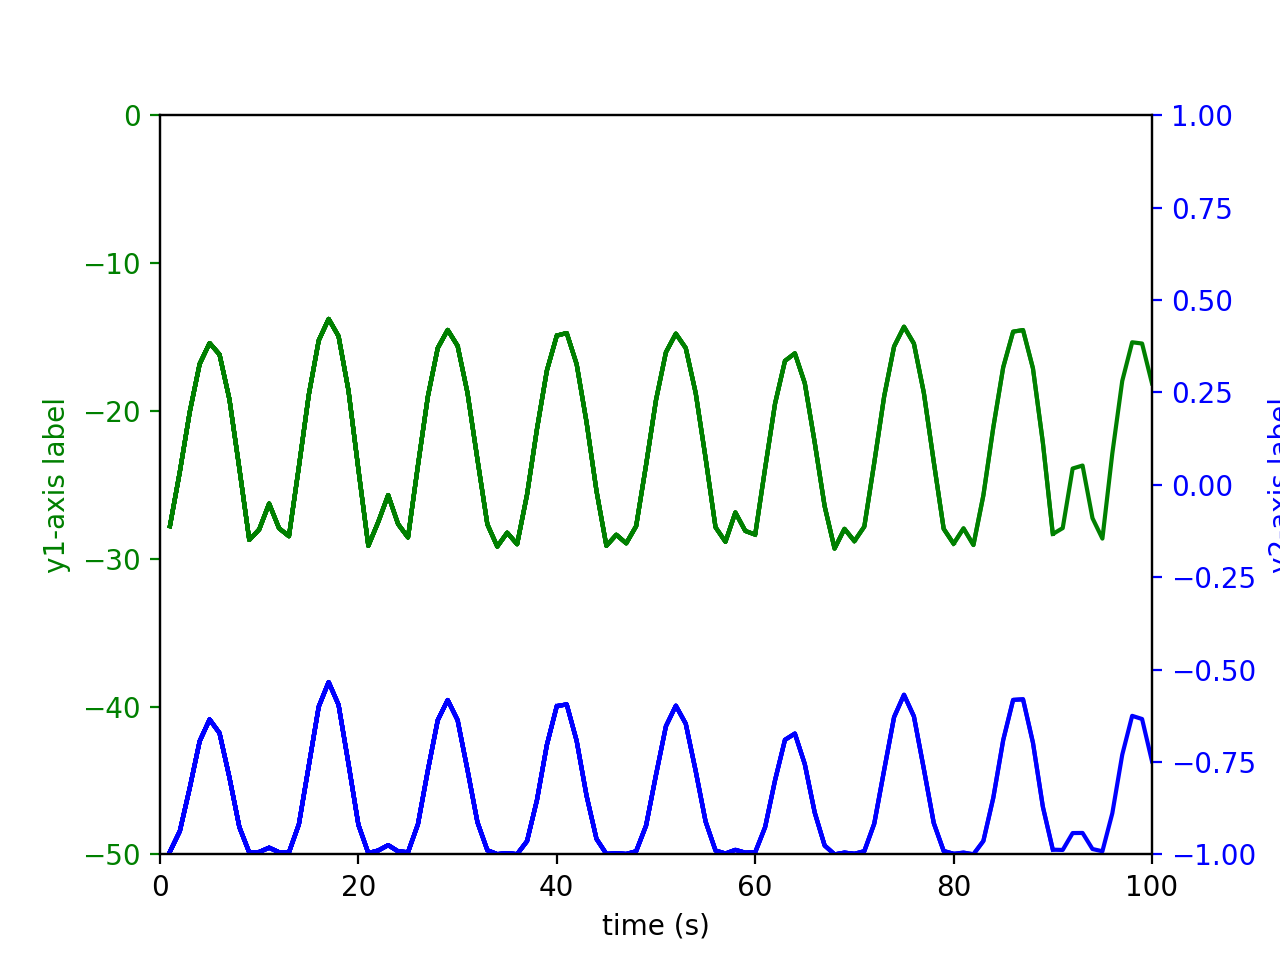

Episode =  200, total reward = -2263.676
Episode =  201, total reward = -2426.764
Episode =  202, total reward = -2383.659
Episode =  203, total reward = -1942.569
Episode =  204, total reward = -2301.760
Episode =  205, total reward = -2476.759
Episode =  206, total reward = -2481.150
Episode =  207, total reward = -2300.302
Episode =  208, total reward = -2486.475
Episode =  209, total reward = -2481.129
Episode =  210, total reward = -2480.495
Episode =  211, total reward = -2350.670
Episode =  212, total reward = -2321.729
Episode =  213, total reward = -2461.423
Episode =  214, total reward = -2306.171
Episode =  215, total reward = -2191.702
Episode =  216, total reward = -2313.567
Episode =  217, total reward = -2313.018
Episode =  218, total reward = -2461.305
Episode =  219, total reward = -2463.954
Episode =  220, total reward = -2430.759
Episode =  221, total reward = -2205.594
Episode =  222, total reward = -2476.165
Episode =  223, total reward = -2380.857
Episode =  224, 

<IPython.core.display.Javascript object>


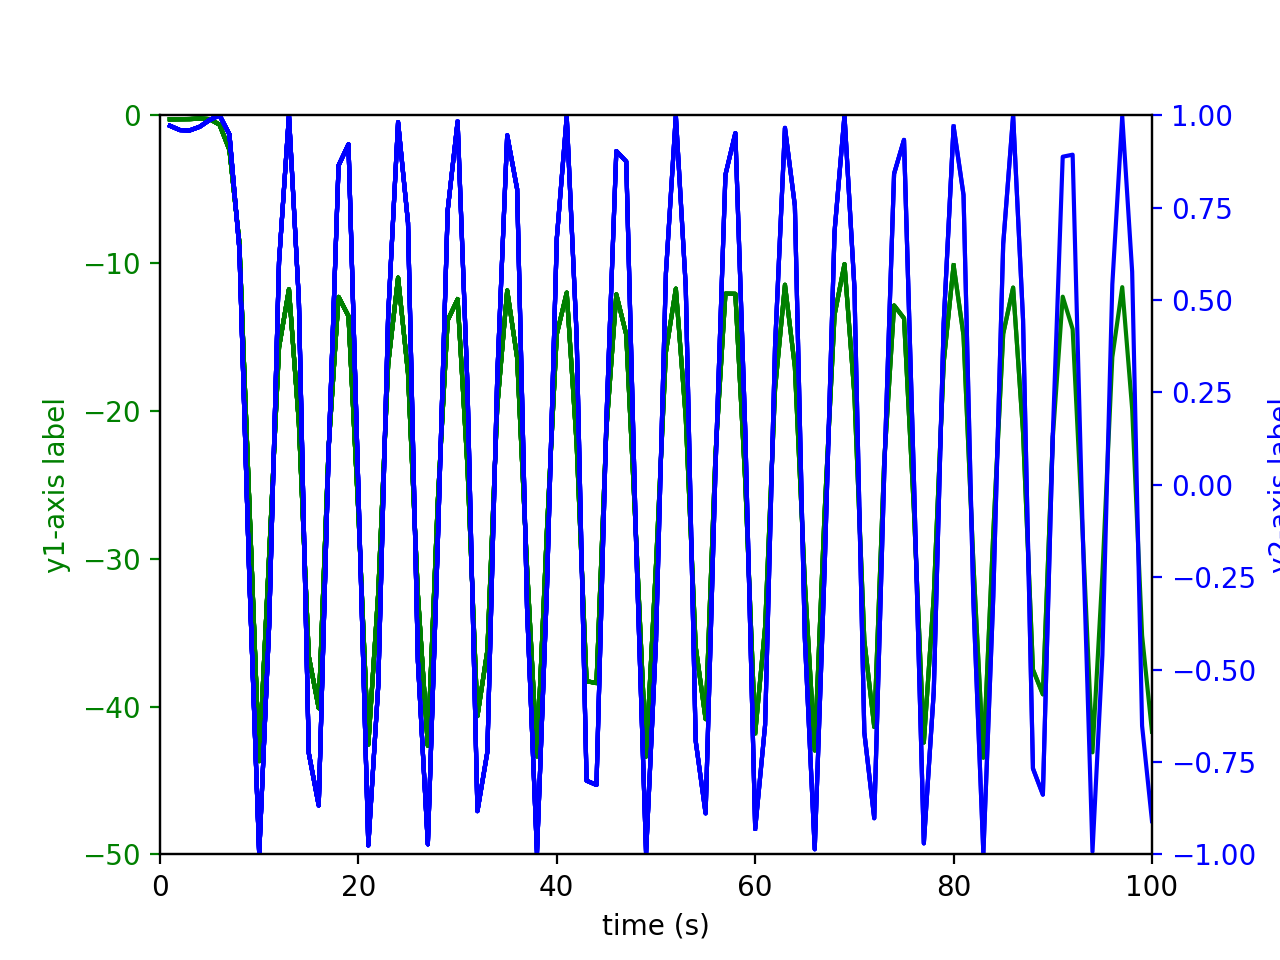

Episode =  250, total reward = -2348.439
Episode =  251, total reward = -2484.906
Episode =  252, total reward = -2329.250
Episode =  253, total reward = -2469.071
Episode =  254, total reward = -1664.199
Episode =  255, total reward = -2473.560
Episode =  256, total reward = -2457.222
Episode =  257, total reward = -2056.237
Episode =  258, total reward = -2345.092
Episode =  259, total reward = -2048.899
Episode =  260, total reward = -2362.754
Episode =  261, total reward = -2296.675
Episode =  262, total reward = -2493.108
Episode =  263, total reward = -1787.236
Episode =  264, total reward = -2463.135
Episode =  265, total reward = -2327.907
Episode =  266, total reward = -2325.360
Episode =  267, total reward = -2385.640
Episode =  268, total reward = -2491.448
Episode =  269, total reward = -2156.644
Episode =  270, total reward = -2419.600
Episode =  271, total reward = -1830.619
Episode =  272, total reward = -2085.403
Episode =  273, total reward = -2119.252
Episode =  274, 

<IPython.core.display.Javascript object>


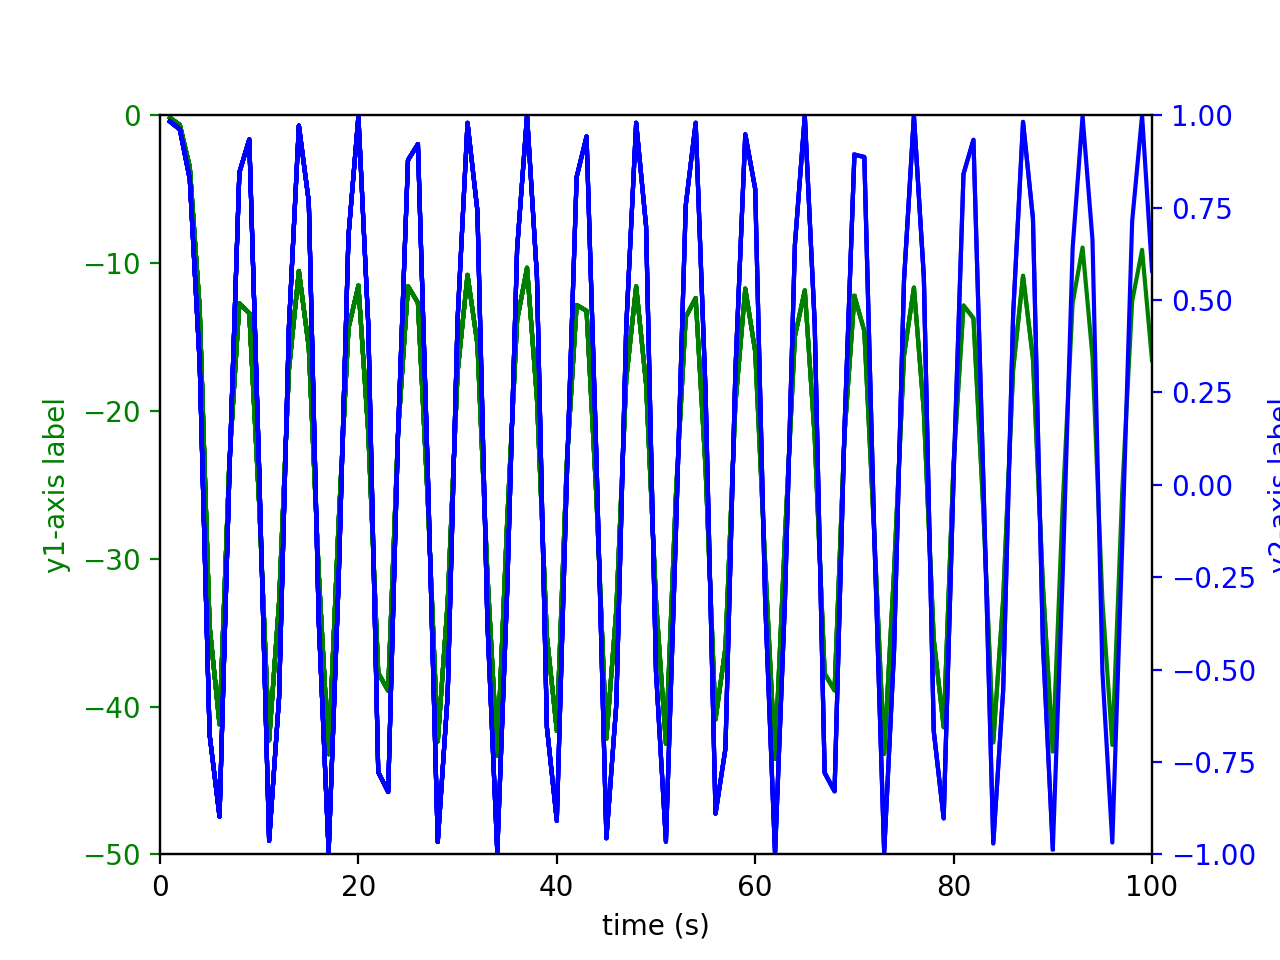

Episode =  300, total reward = -2412.452
Episode =  301, total reward = -2131.754
Episode =  302, total reward = -1586.213
Episode =  303, total reward = -1777.213
Episode =  304, total reward = -1713.674
Episode =  305, total reward = -1782.202
Episode =  306, total reward = -2493.744
Episode =  307, total reward = -1776.477
Episode =  308, total reward = -2379.383
Episode =  309, total reward = -2481.333
Episode =  310, total reward = -2479.145
Episode =  311, total reward = -2349.244
Episode =  312, total reward = -2490.477
Episode =  313, total reward = -1883.673
Episode =  314, total reward = -2283.627
Episode =  315, total reward = -1783.367
Episode =  316, total reward = -1898.682
Episode =  317, total reward = -2478.364
Episode =  318, total reward = -2484.604
Episode =  319, total reward = -2493.335
Episode =  320, total reward = -2292.633
Episode =  321, total reward = -2104.906
Episode =  322, total reward = -2358.244
Episode =  323, total reward = -2459.035
Episode =  324, 

<IPython.core.display.Javascript object>


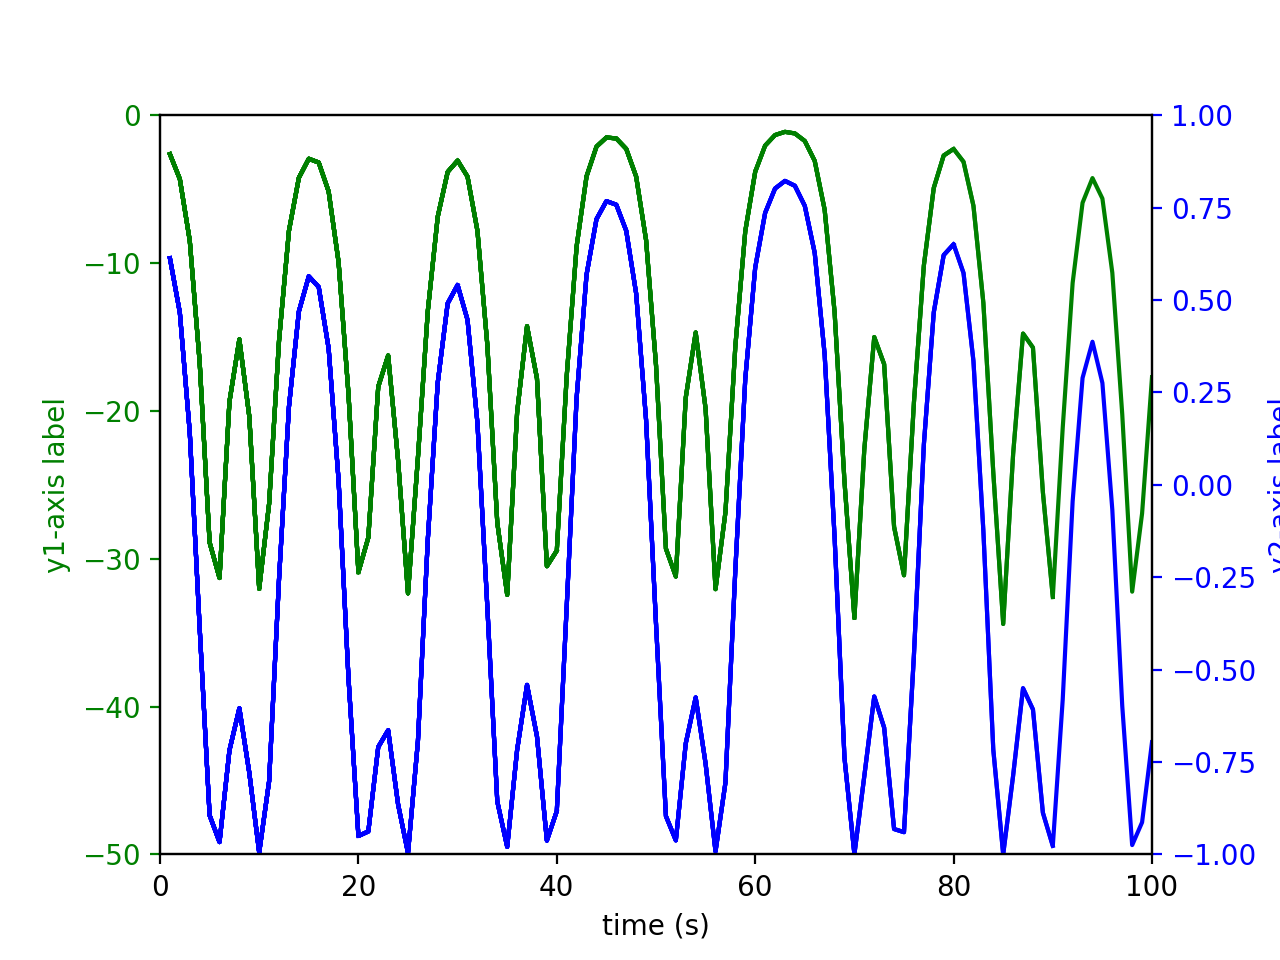

Episode =  350, total reward = -1547.462
Episode =  351, total reward = -2328.516
Episode =  352, total reward = -2328.209
Episode =  353, total reward = -2298.490
Episode =  354, total reward = -2346.233
Episode =  355, total reward = -1659.983
Episode =  356, total reward = -2329.103
Episode =  357, total reward = -2118.031
Episode =  358, total reward = -1743.878
Episode =  359, total reward = -1722.196
Episode =  360, total reward = -1950.842
Episode =  361, total reward = -2197.479
Episode =  362, total reward = -2039.675
Episode =  363, total reward = -2337.828
Episode =  364, total reward = -2376.653
Episode =  365, total reward = -2032.873
Episode =  366, total reward = -2360.959
Episode =  367, total reward = -2312.001
Episode =  368, total reward = -2463.805
Episode =  369, total reward = -2313.222
Episode =  370, total reward = -2376.139
Episode =  371, total reward = -2455.345
Episode =  372, total reward = -2038.464
Episode =  373, total reward = -2364.057
Episode =  374, 

<IPython.core.display.Javascript object>


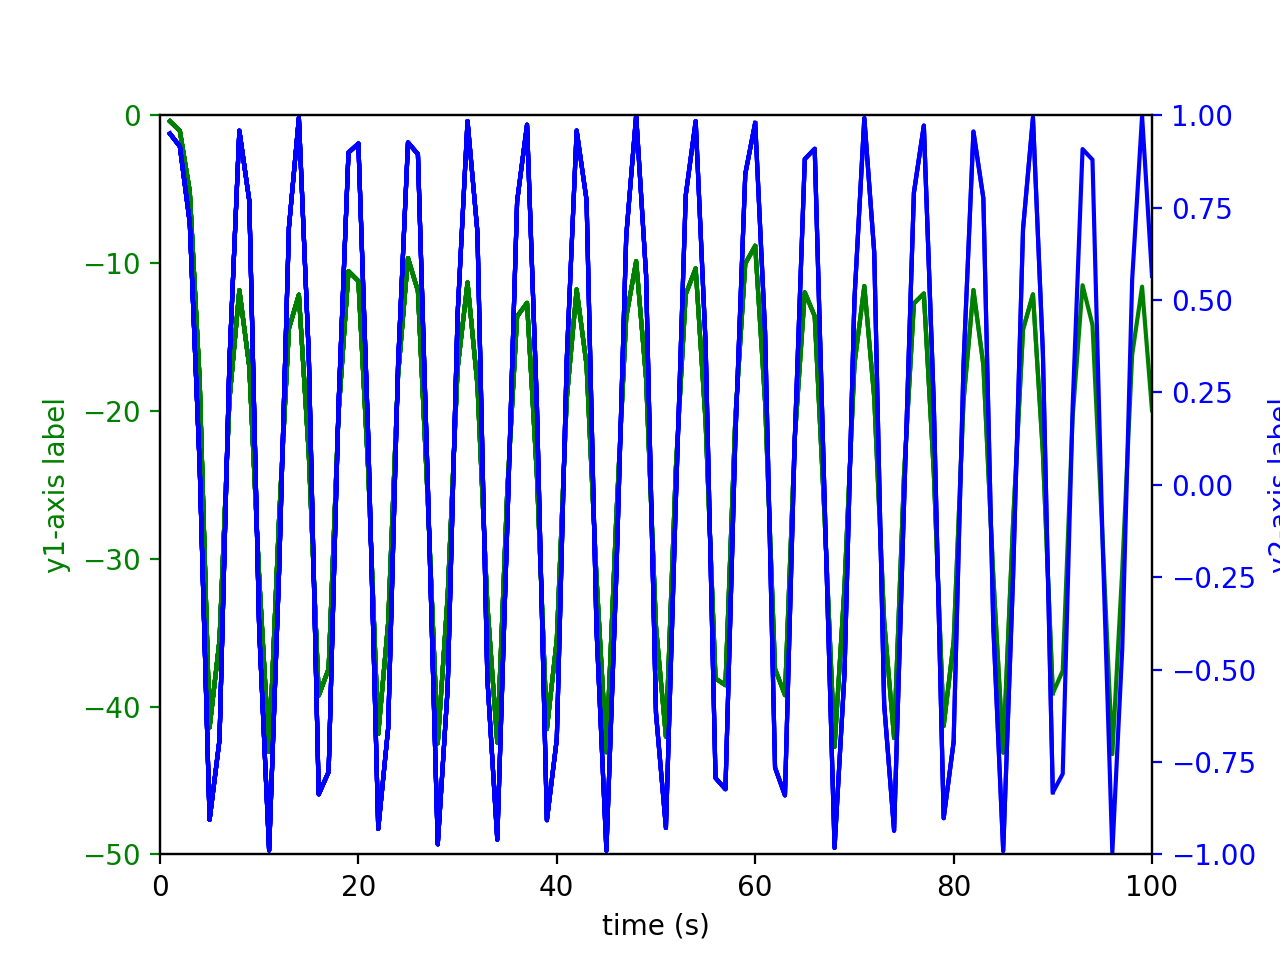

Episode =  400, total reward = -2413.192
Episode =  401, total reward = -2456.062
Episode =  402, total reward = -1782.685
Episode =  403, total reward = -2451.502
Episode =  404, total reward = -2418.772
Episode =  405, total reward = -1914.777
Episode =  406, total reward = -2456.492
Episode =  407, total reward = -1911.928
Episode =  408, total reward = -2475.425
Episode =  409, total reward = -1956.520
Episode =  410, total reward = -1769.639
Episode =  411, total reward = -1829.584
Episode =  412, total reward = -1838.535
Episode =  413, total reward = -1549.754
Episode =  414, total reward = -2277.049
Episode =  415, total reward = -1683.185
Episode =  416, total reward = -1628.344
Episode =  417, total reward = -1979.743
Episode =  418, total reward = -1651.672
Episode =  419, total reward = -2297.059
Episode =  420, total reward = -2298.882
Episode =  421, total reward = -2460.252
Episode =  422, total reward = -2344.547
Episode =  423, total reward = -2473.533
Episode =  424, 

<IPython.core.display.Javascript object>


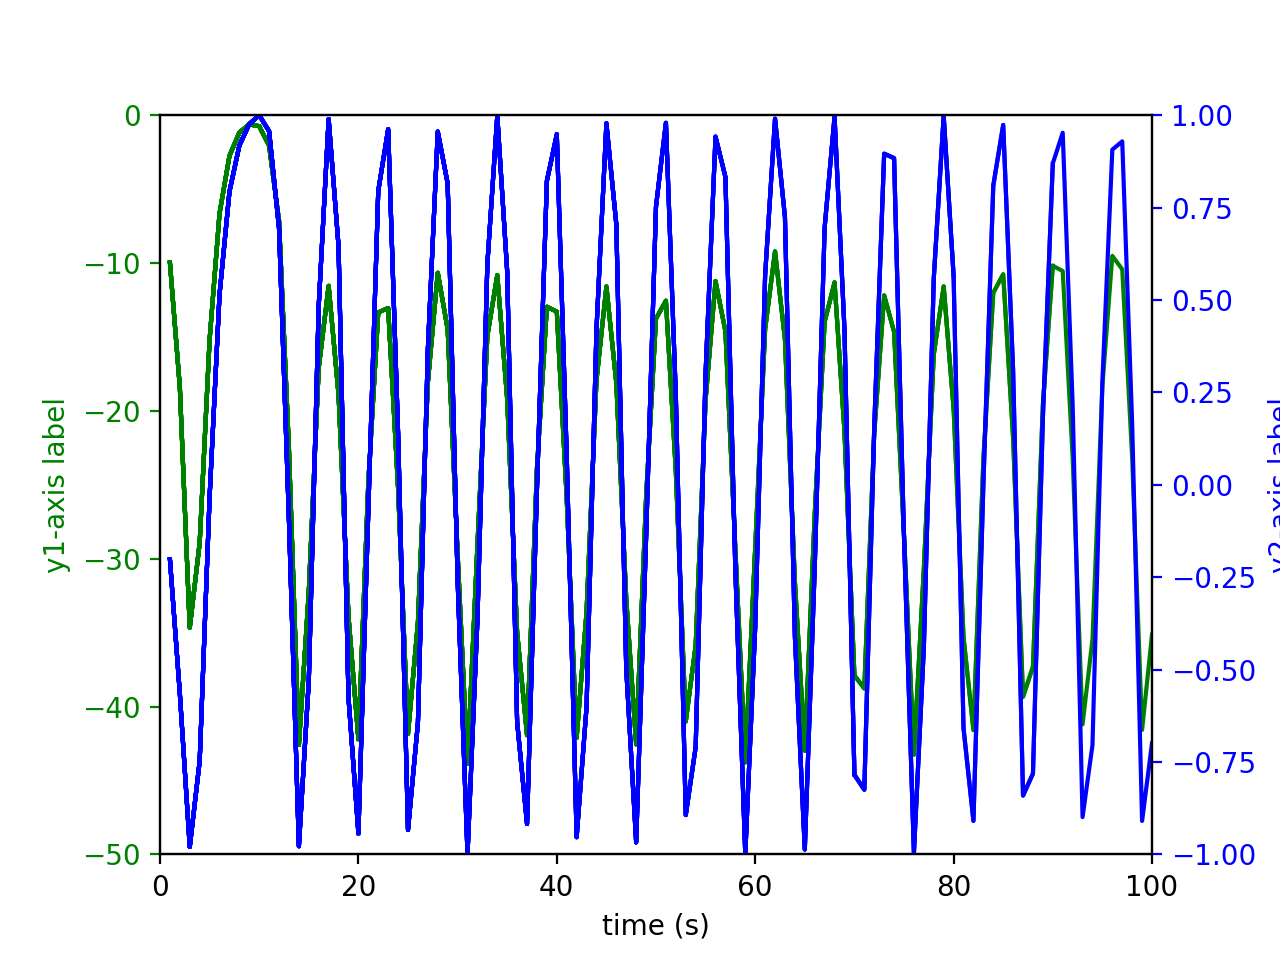

Episode =  450, total reward = -2324.770
Episode =  451, total reward = -1788.566
Episode =  452, total reward = -1915.488
Episode =  453, total reward = -2069.808
Episode =  454, total reward = -2343.900
Episode =  455, total reward = -2279.066
Episode =  456, total reward = -2498.245
Episode =  457, total reward = -1919.521
Episode =  458, total reward = -1653.854
Episode =  459, total reward = -2478.127
Episode =  460, total reward = -2462.349
Episode =  461, total reward = -2281.685
Episode =  462, total reward = -1923.425
Episode =  463, total reward = -2325.827
Episode =  464, total reward = -1873.097
Episode =  465, total reward = -2428.885
Episode =  466, total reward = -2288.871
Episode =  467, total reward = -1552.654
Episode =  468, total reward = -2465.645
Episode =  469, total reward = -2211.698
Episode =  470, total reward = -2312.741
Episode =  471, total reward = -2173.159
Episode =  472, total reward = -1662.221
Episode =  473, total reward = -1655.606
Episode =  474, 

<IPython.core.display.Javascript object>


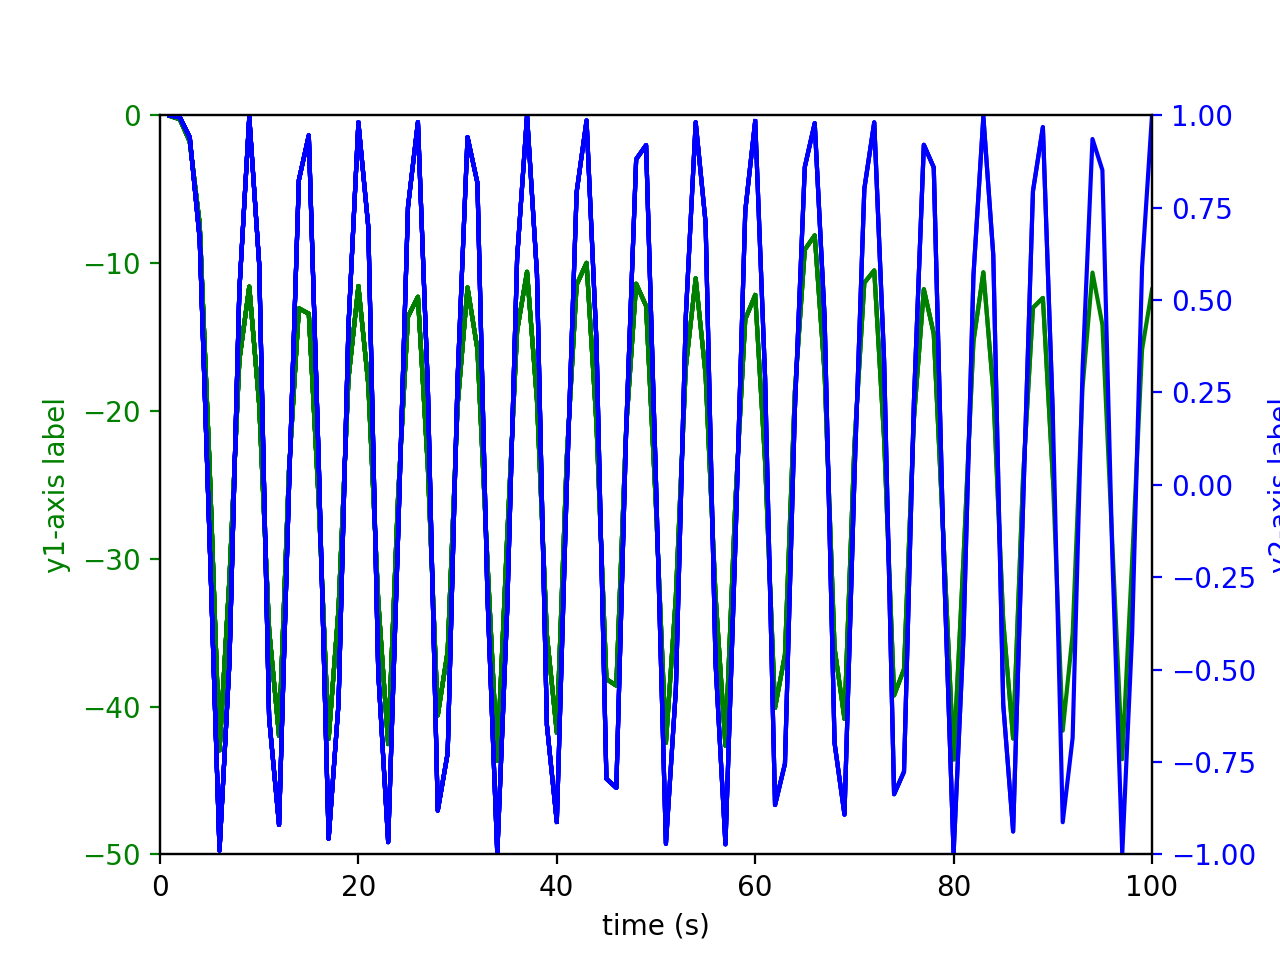

Episode =  500, total reward = -2381.813
Episode =  501, total reward = -2468.044
Episode =  502, total reward = -2123.870
Episode =  503, total reward = -2362.164
Episode =  504, total reward = -1954.166
Episode =  505, total reward = -2017.194
Episode =  506, total reward = -1907.657
Episode =  507, total reward = -2457.116
Episode =  508, total reward = -2341.502
Episode =  509, total reward = -2306.657
Episode =  510, total reward = -1668.907
Episode =  511, total reward = -2332.331
Episode =  512, total reward = -1852.261
Episode =  513, total reward = -2480.488
Episode =  514, total reward = -1639.563
Episode =  515, total reward = -2042.688
Episode =  516, total reward = -2484.310
Episode =  517, total reward = -2324.477
Episode =  518, total reward = -2475.344
Episode =  519, total reward = -2233.680
Episode =  520, total reward = -1985.008
Episode =  521, total reward = -2483.743
Episode =  522, total reward = -1877.672
Episode =  523, total reward = -1706.577
Episode =  524, 

<IPython.core.display.Javascript object>


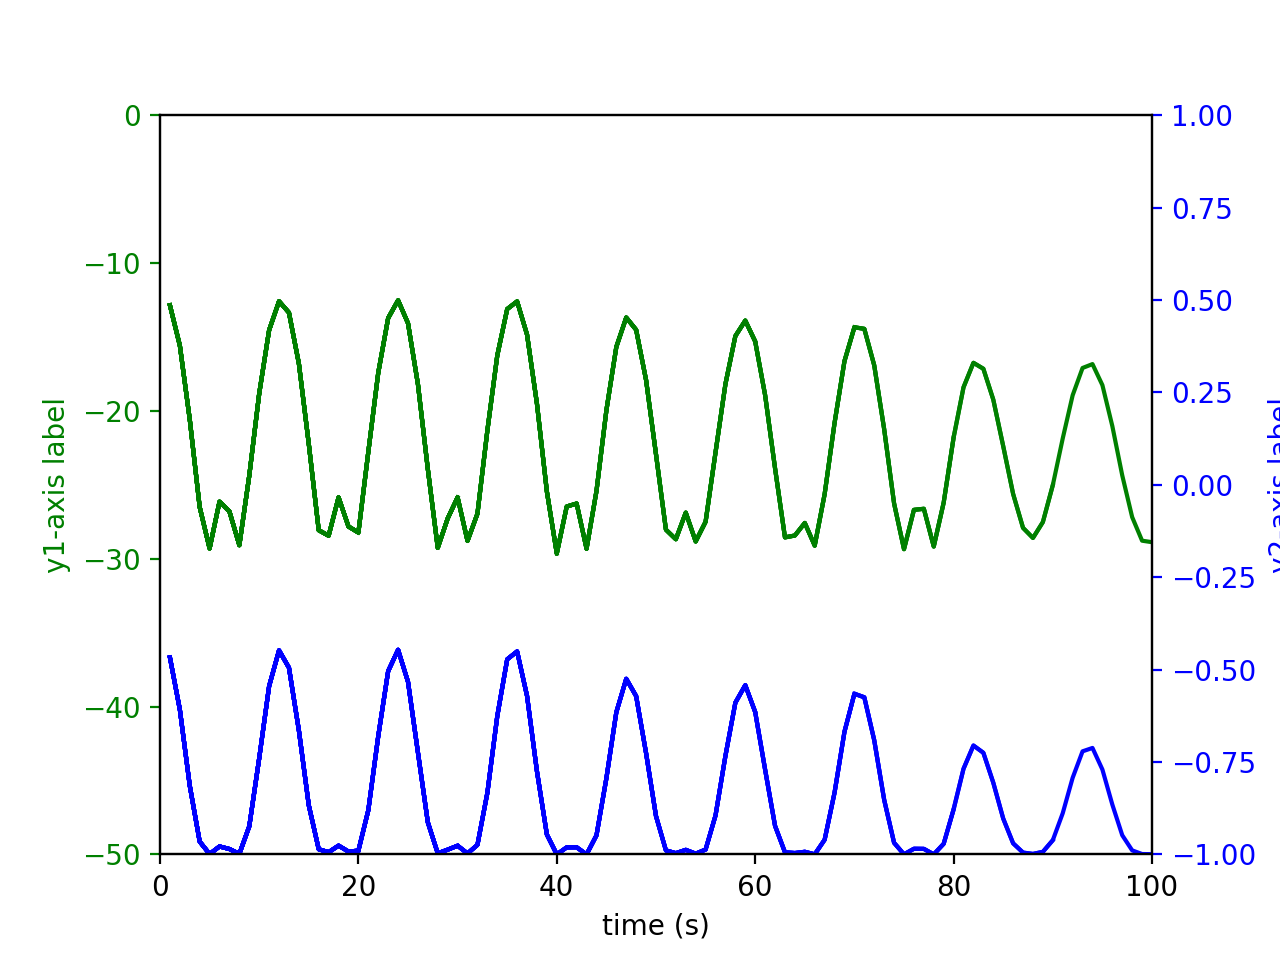

Episode =  550, total reward = -2250.818
Episode =  551, total reward = -2480.024
Episode =  552, total reward = -2472.864
Episode =  553, total reward = -2302.516
Episode =  554, total reward = -2483.002
Episode =  555, total reward = -2322.106
Episode =  556, total reward = -2438.526
Episode =  557, total reward = -2280.929
Episode =  558, total reward = -2459.115
Episode =  559, total reward = -2321.931
Episode =  560, total reward = -2165.338
Episode =  561, total reward = -2489.089
Episode =  562, total reward = -2466.484
Episode =  563, total reward = -2273.152
Episode =  564, total reward = -2479.150
Episode =  565, total reward = -1963.222
Episode =  566, total reward = -1970.389
Episode =  567, total reward = -2103.721
Episode =  568, total reward = -2318.158
Episode =  569, total reward = -2476.639
Episode =  570, total reward = -2485.922
Episode =  571, total reward = -2306.088
Episode =  572, total reward = -2001.993
Episode =  573, total reward = -2123.409
Episode =  574, 

<IPython.core.display.Javascript object>


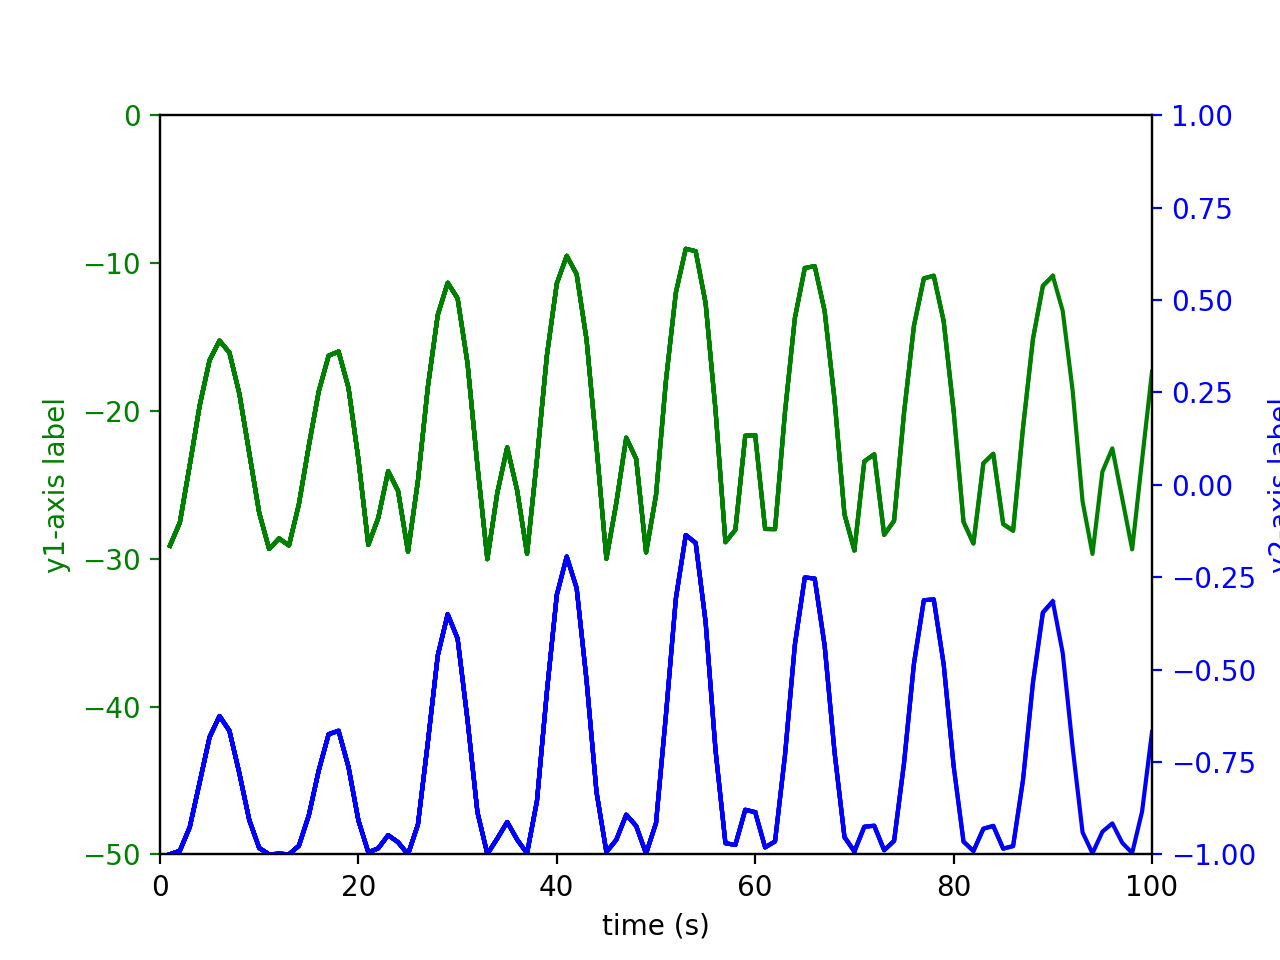

Episode =  600, total reward = -2133.433
Episode =  601, total reward = -2361.893
Episode =  602, total reward = -2305.542
Episode =  603, total reward = -2264.302
Episode =  604, total reward = -1634.128
Episode =  605, total reward = -1976.853
Episode =  606, total reward = -1786.195
Episode =  607, total reward = -2499.081
Episode =  608, total reward = -1904.314
Episode =  609, total reward = -2033.347
Episode =  610, total reward = -2324.829
Episode =  611, total reward = -2426.666
Episode =  612, total reward = -2493.719
Episode =  613, total reward = -1635.816
Episode =  614, total reward = -1999.154
Episode =  615, total reward = -2414.240
Episode =  616, total reward = -2467.227
Episode =  617, total reward = -2464.049
Episode =  618, total reward = -1495.879
Episode =  619, total reward = -2121.884
Episode =  620, total reward = -1925.917
Episode =  621, total reward = -2170.795
Episode =  622, total reward = -2474.662
Episode =  623, total reward = -2465.121
Episode =  624, 

<IPython.core.display.Javascript object>


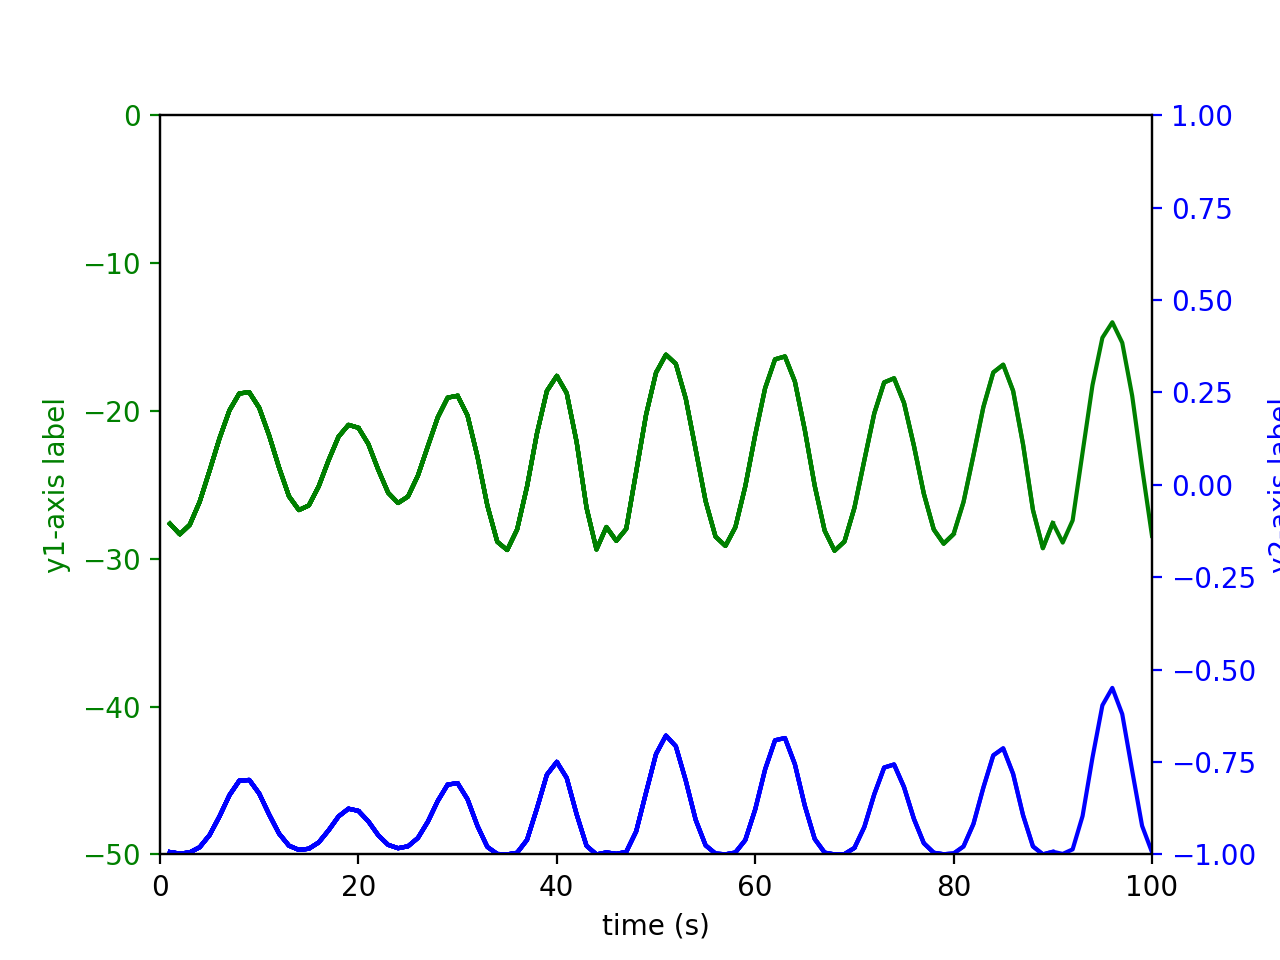

Episode =  650, total reward = -2344.297
Episode =  651, total reward = -2238.081
Episode =  652, total reward = -2490.865
Episode =  653, total reward = -1585.783
Episode =  654, total reward = -2346.404
Episode =  655, total reward = -2269.397
Episode =  656, total reward = -2118.653
Episode =  657, total reward = -1767.482
Episode =  658, total reward = -2426.445
Episode =  659, total reward = -2304.249
Episode =  660, total reward = -2482.105
Episode =  661, total reward = -2277.381
Episode =  662, total reward = -1910.504
Episode =  663, total reward = -1897.447
Episode =  664, total reward = -2425.744
Episode =  665, total reward = -2348.017
Episode =  666, total reward = -2324.063
Episode =  667, total reward = -1568.616
Episode =  668, total reward = -2444.916
Episode =  669, total reward = -2317.509
Episode =  670, total reward = -2291.816
Episode =  671, total reward = -2223.255
Episode =  672, total reward = -2479.842
Episode =  673, total reward = -2191.564
Episode =  674, 

<IPython.core.display.Javascript object>


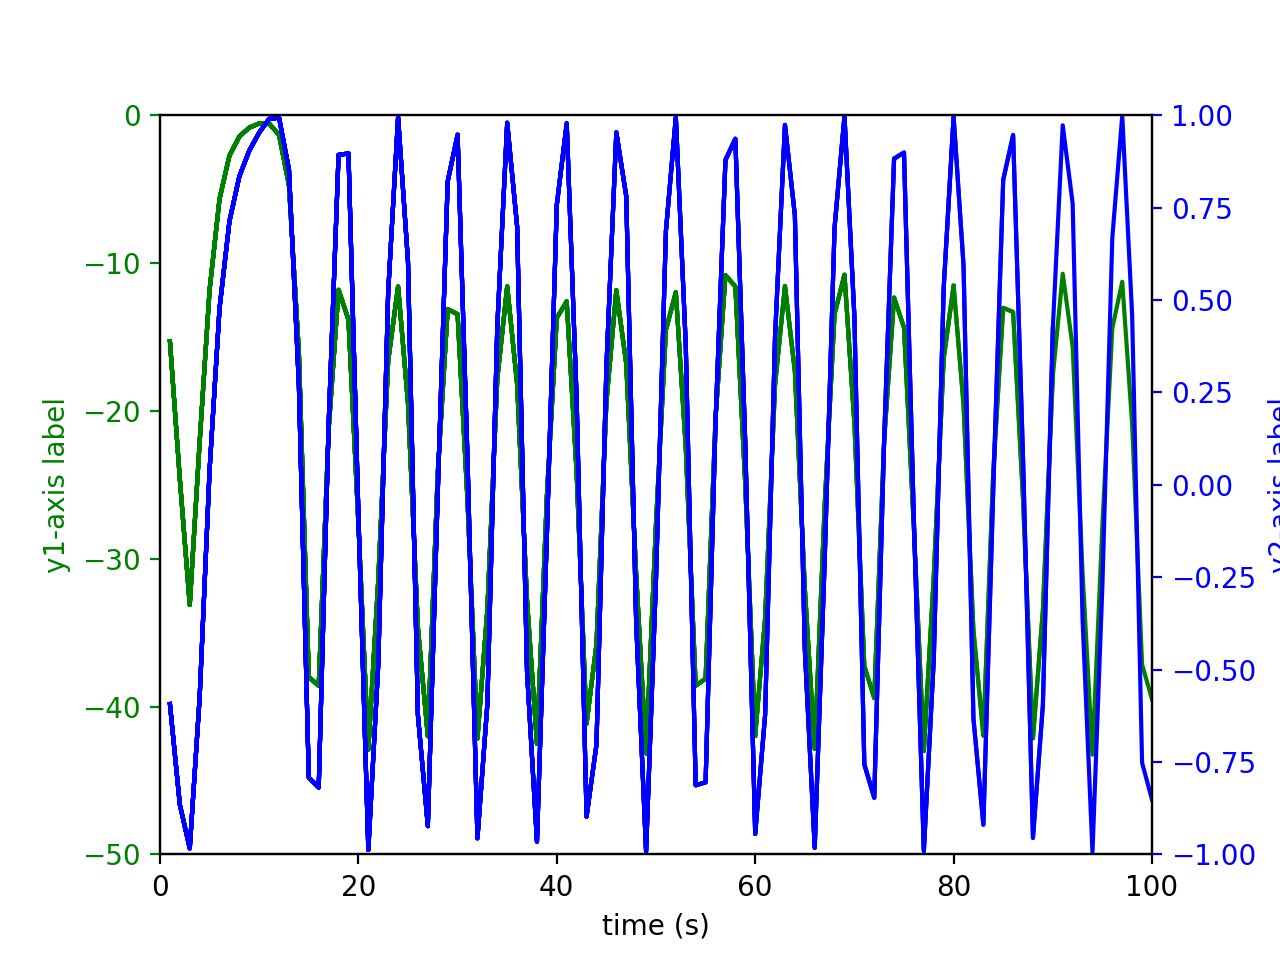

Episode =  700, total reward = -2327.348
Episode =  701, total reward = -2390.549
Episode =  702, total reward = -2205.516
Episode =  703, total reward = -2470.586
Episode =  704, total reward = -2465.784
Episode =  705, total reward = -2482.462
Episode =  706, total reward = -2470.641
Episode =  707, total reward = -1871.264
Episode =  708, total reward = -2139.191
Episode =  709, total reward = -1648.822
Episode =  710, total reward = -2472.996
Episode =  711, total reward = -2475.837
Episode =  712, total reward = -1938.486
Episode =  713, total reward = -2228.134
Episode =  714, total reward = -2277.216
Episode =  715, total reward = -2090.697
Episode =  716, total reward = -1955.649
Episode =  717, total reward = -2424.893
Episode =  718, total reward = -2173.163
Episode =  719, total reward = -2468.817
Episode =  720, total reward = -1788.591
Episode =  721, total reward = -2207.531
Episode =  722, total reward = -1765.873
Episode =  723, total reward = -2347.476
Episode =  724, 

<IPython.core.display.Javascript object>


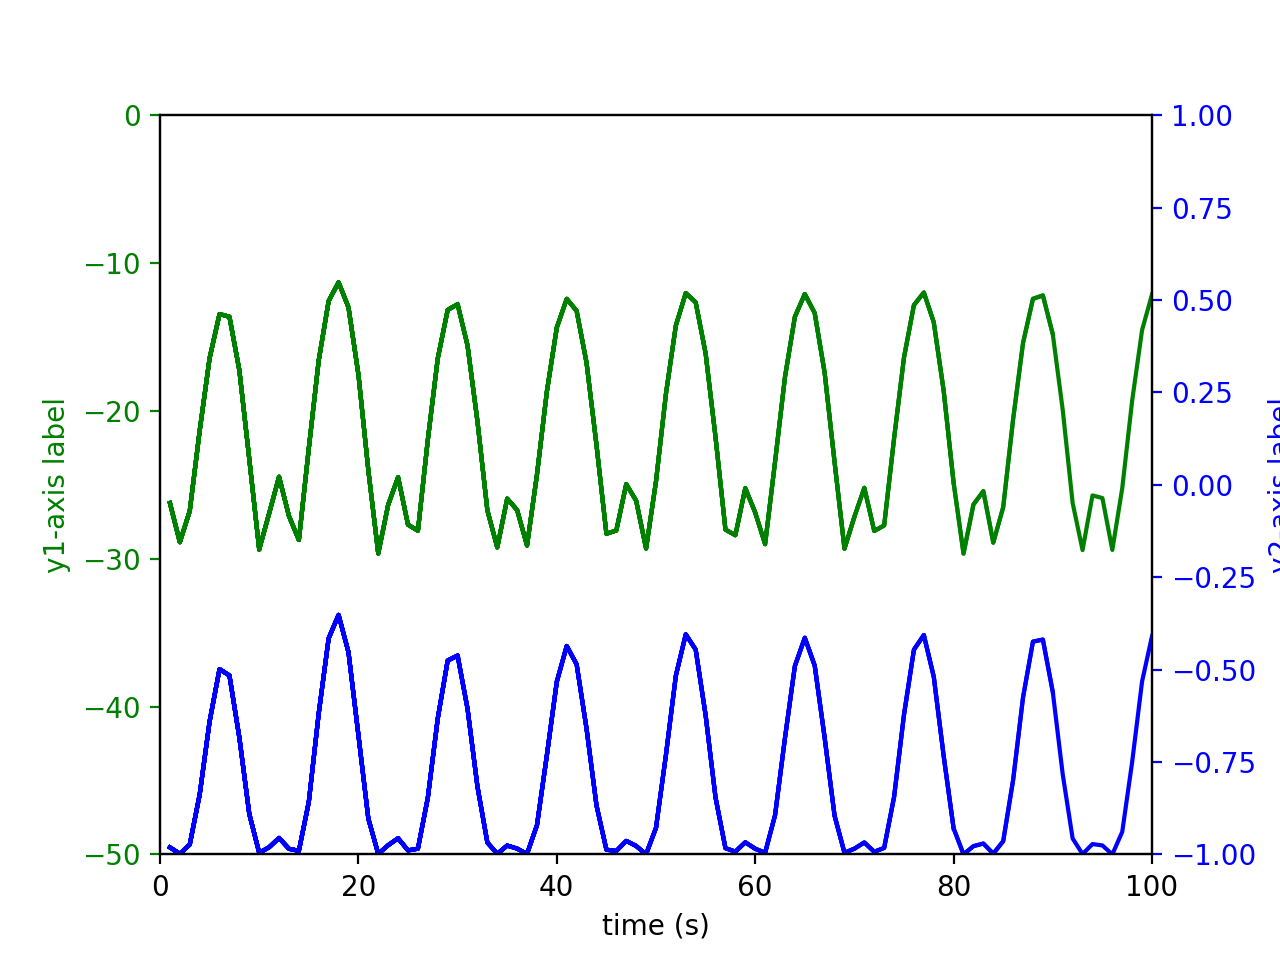

Episode =  750, total reward = -2164.712
Episode =  751, total reward = -1788.875
Episode =  752, total reward = -2415.931
Episode =  753, total reward = -1948.123
Episode =  754, total reward = -1861.993
Episode =  755, total reward = -2478.866
Episode =  756, total reward = -1678.595
Episode =  757, total reward = -2358.486
Episode =  758, total reward = -2343.021
Episode =  759, total reward = -1796.633
Episode =  760, total reward = -1643.768
Episode =  761, total reward = -2378.812
Episode =  762, total reward = -1908.058
Episode =  763, total reward = -2476.983
Episode =  764, total reward = -1900.906
Episode =  765, total reward = -1924.306
Episode =  766, total reward = -2487.418
Episode =  767, total reward = -2356.401
Episode =  768, total reward = -2346.506
Episode =  769, total reward = -2454.469
Episode =  770, total reward = -2487.269
Episode =  771, total reward = -2502.316
Episode =  772, total reward = -2341.548
Episode =  773, total reward = -2394.522
Episode =  774, 

<IPython.core.display.Javascript object>


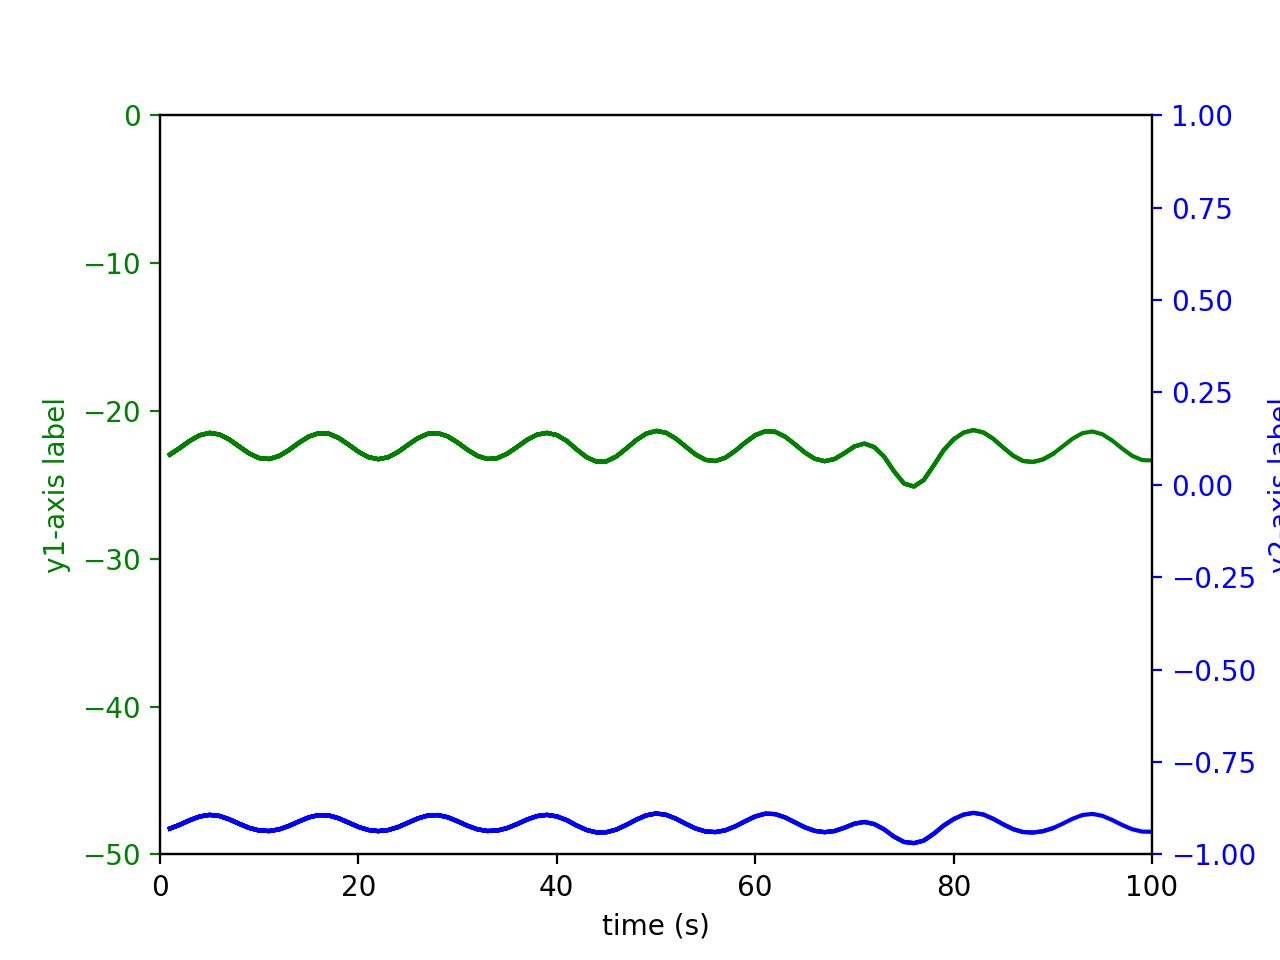

Episode =  800, total reward = -2273.808
Episode =  801, total reward = -2328.833
Episode =  802, total reward = -1971.700
Episode =  803, total reward = -1772.559
Episode =  804, total reward = -2260.797
Episode =  805, total reward = -2084.904
Episode =  806, total reward = -1642.253
Episode =  807, total reward = -2134.396
Episode =  808, total reward = -2459.453
Episode =  809, total reward = -2481.425
Episode =  810, total reward = -2417.387
Episode =  811, total reward = -2454.263
Episode =  812, total reward = -2370.599
Episode =  813, total reward = -2412.721
Episode =  814, total reward = -2426.575
Episode =  815, total reward = -2486.632
Episode =  816, total reward = -2479.673
Episode =  817, total reward = -1791.416
Episode =  818, total reward = -1892.478
Episode =  819, total reward = -1899.109
Episode =  820, total reward = -2377.014
Episode =  821, total reward = -2170.146
Episode =  822, total reward = -1975.824
Episode =  823, total reward = -2045.037
Episode =  824, 

<IPython.core.display.Javascript object>


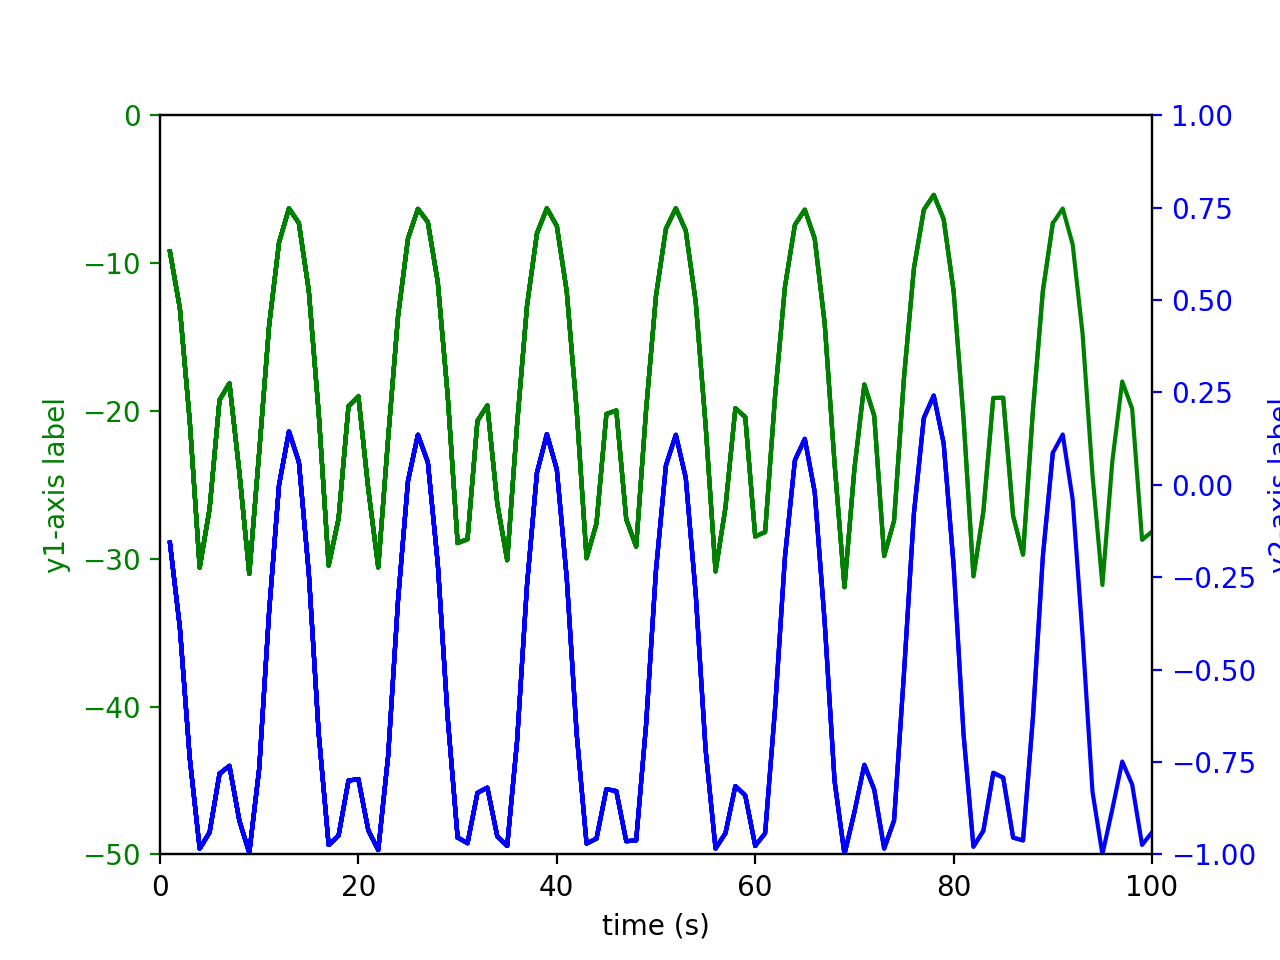

Episode =  850, total reward = -1898.062
Episode =  851, total reward = -1876.412
Episode =  852, total reward = -1855.514
Episode =  853, total reward = -2460.321
Episode =  854, total reward = -1650.769
Episode =  855, total reward = -2057.622
Episode =  856, total reward = -2312.823
Episode =  857, total reward = -2357.396
Episode =  858, total reward = -2363.233
Episode =  859, total reward = -2016.113
Episode =  860, total reward = -2283.362
Episode =  861, total reward = -2383.920
Episode =  862, total reward = -2484.983
Episode =  863, total reward = -1924.364
Episode =  864, total reward = -2306.616
Episode =  865, total reward = -2481.315
Episode =  866, total reward = -2270.709
Episode =  867, total reward = -2468.190
Episode =  868, total reward = -2480.542
Episode =  869, total reward = -2268.405
Episode =  870, total reward = -2134.939
Episode =  871, total reward = -2102.684
Episode =  872, total reward = -2133.952
Episode =  873, total reward = -1945.508
Episode =  874, 

<IPython.core.display.Javascript object>


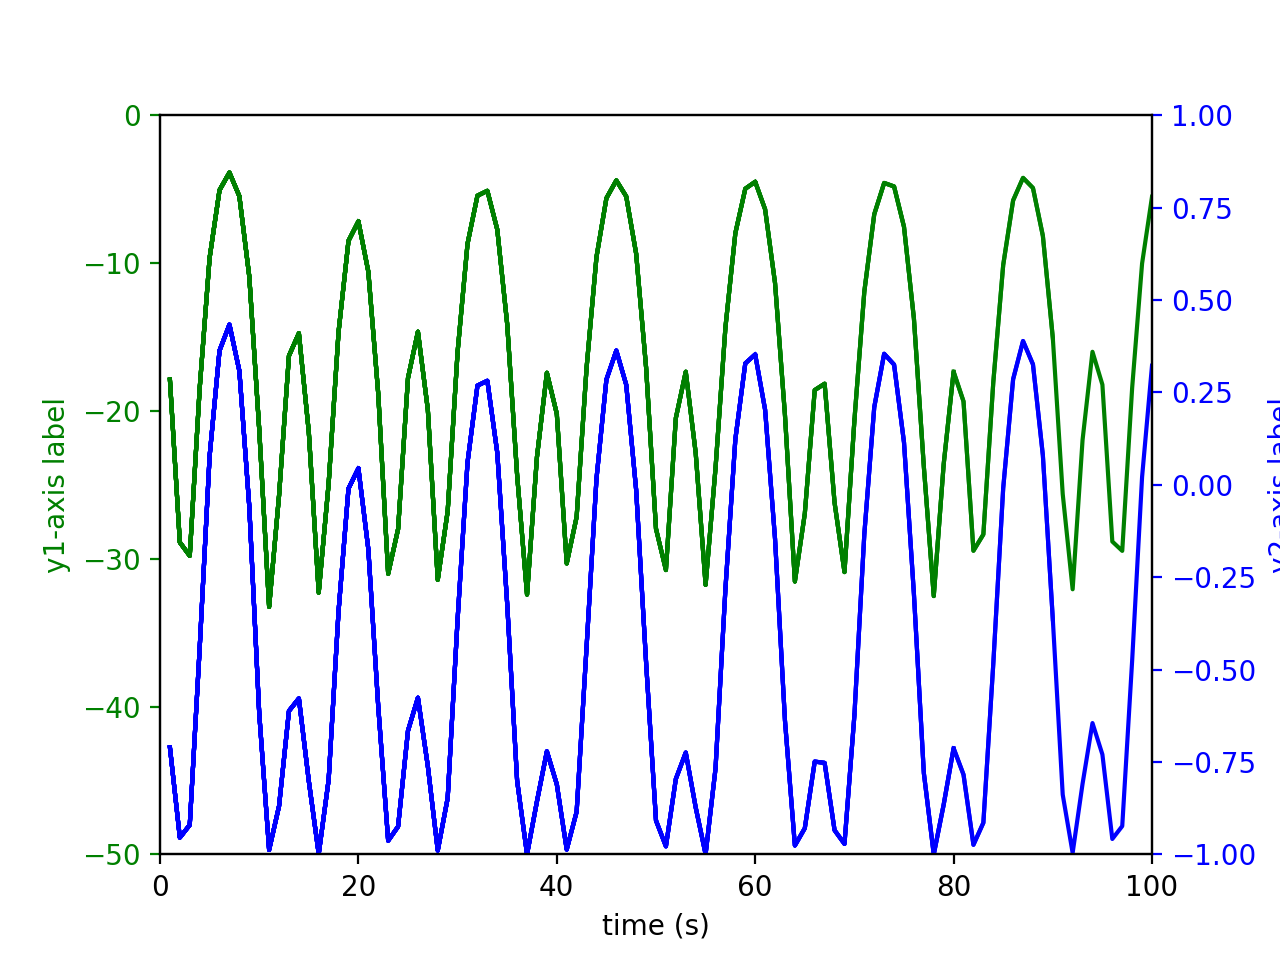

Episode =  900, total reward = -1768.159
Episode =  901, total reward = -2197.320
Episode =  902, total reward = -2426.436
Episode =  903, total reward = -2301.221
Episode =  904, total reward = -2024.181
Episode =  905, total reward = -2167.678
Episode =  906, total reward = -2335.090
Episode =  907, total reward = -2476.942
Episode =  908, total reward = -2339.584
Episode =  909, total reward = -2411.684
Episode =  910, total reward = -2014.520
Episode =  911, total reward = -2479.196
Episode =  912, total reward = -2299.437
Episode =  913, total reward = -2122.101
Episode =  914, total reward = -2461.227
Episode =  915, total reward = -2289.137
Episode =  916, total reward = -2316.258
Episode =  917, total reward = -1871.905
Episode =  918, total reward = -2410.572
Episode =  919, total reward = -2342.459
Episode =  920, total reward = -2379.197
Episode =  921, total reward = -1532.416
Episode =  922, total reward = -1924.170
Episode =  923, total reward = -2480.362
Episode =  924, 

<IPython.core.display.Javascript object>


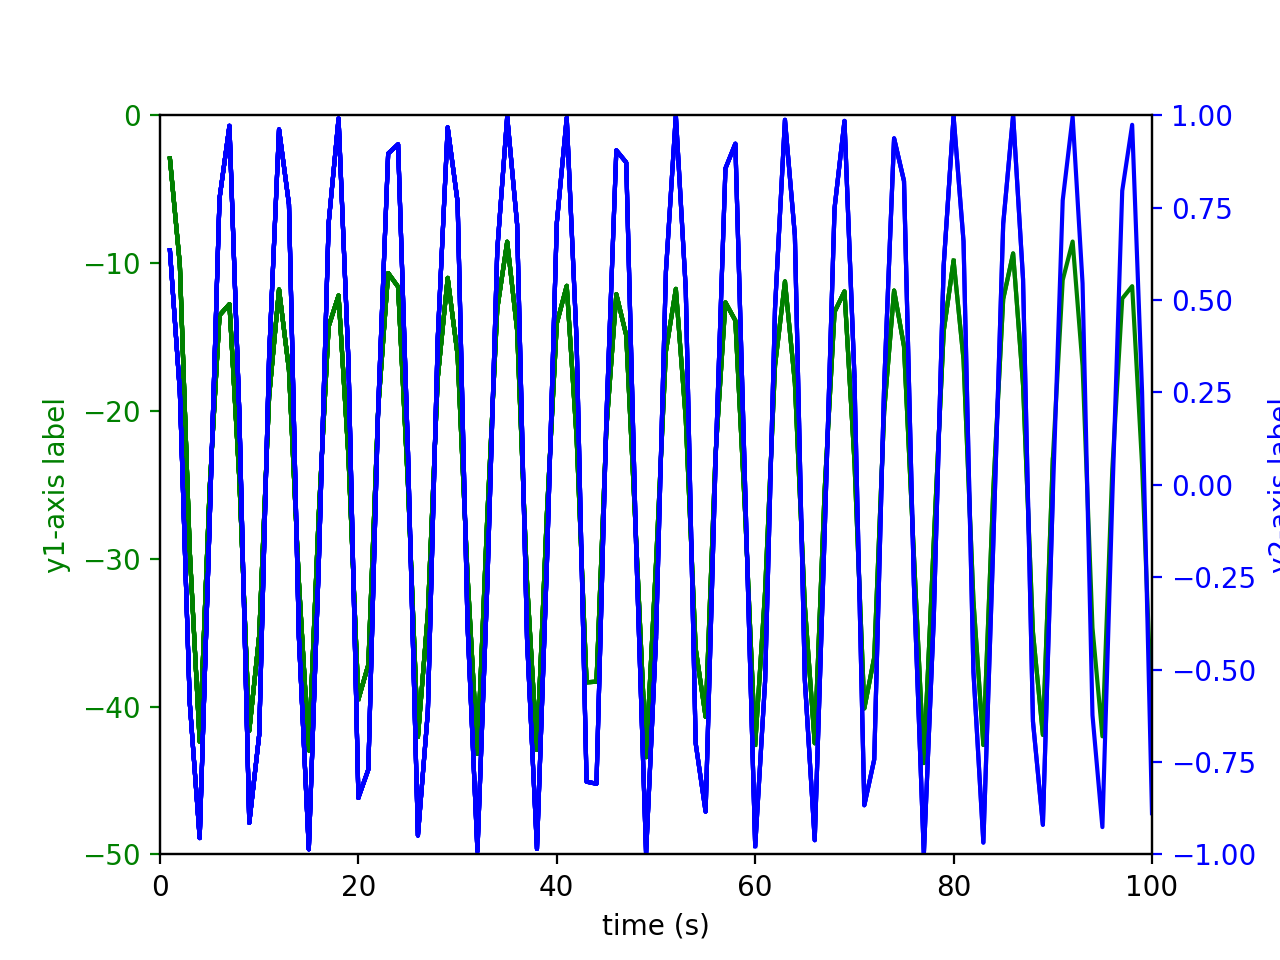

Episode =  950, total reward = -2458.720
Episode =  951, total reward = -1556.366
Episode =  952, total reward = -1712.145
Episode =  953, total reward = -2379.433
Episode =  954, total reward = -2457.135
Episode =  955, total reward = -1641.409
Episode =  956, total reward = -1724.800
Episode =  957, total reward = -1653.610
Episode =  958, total reward = -2139.452
Episode =  959, total reward = -2458.070
Episode =  960, total reward = -2311.393
Episode =  961, total reward = -1911.708
Episode =  962, total reward = -2254.473
Episode =  963, total reward = -2220.301
Episode =  964, total reward = -2461.354
Episode =  965, total reward = -1987.376
Episode =  966, total reward = -2406.324
Episode =  967, total reward = -2079.928
Episode =  968, total reward = -2414.530
Episode =  969, total reward = -1841.168
Episode =  970, total reward = -2138.015
Episode =  971, total reward = -1820.858
Episode =  972, total reward = -2462.101
Episode =  973, total reward = -2494.955
Episode =  974, 

<IPython.core.display.Javascript object>


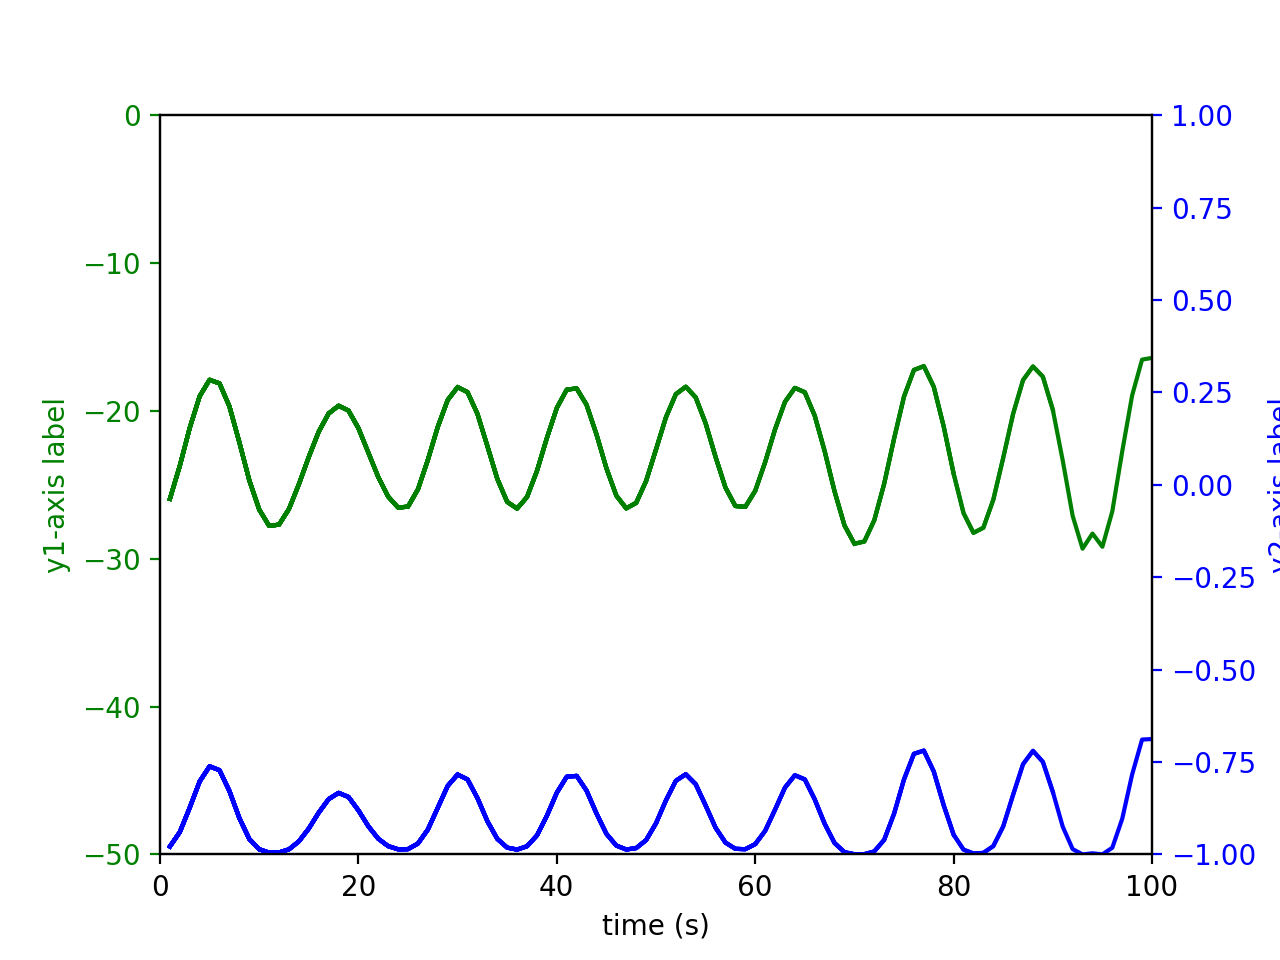

Episode = 1000, total reward = -2296.524


In [2]:
# you must include '%matplotlib notebook' for this to work
%matplotlib notebook

import gym
import sys
from agents.agent import DDPG
from pendulum_task import PendulumTask

num_episodes = 1000
task = PendulumTask()
agent = DDPG(task) 

display_freq = 50
display_step_freq = 10

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    
    
    display_graph = i_episode % display_freq == 0
    if display_graph:
        # prior to the start of each episode, clear the datapoints
        x, y1, y2 = [], [], []    
        fig, sub1, sub2 = plt_init()

    step = 0
    total_reward = 0
    
    while True:
        step += 1
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        total_reward += reward
        # within the episode loop
        if display_graph:
            x.append(step) # time
            y1.append(reward) # y-axis 1 values
            y2.append(next_state[0]) # y-axis 2 values
            
            if step % display_step_freq == 0:
                plt_dynamic(fig, sub1, sub2, x, y1, y2)
            
            #print(task.current_steps)
            #print(f'Episode number {i_episode}')
            #print(f'action {action}, reward {reward}, next_state {next_state}, done {done}')
        #    print(f'Plot values - time {task.sim.time}, reward {reward}, z {task.sim.pose[2]}')
        #if done:
        #    print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
        #        i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
        #    break
        if done:
            print("\rEpisode = {:4d}, total reward = {:7.3f}".format(
                i_episode, total_reward))  # [debug]
        #    if (episode % display_freq == 0) and (display_graph == True):
        #               plt_dynamic(x, y1, y2)
            break

    #if display_graph:  
    #    plt_clear(fig)
    #sys.stdout.flush()

In [ ]:
init_pose = [0., 0., 10., 0., 0., 0.]
inital_velocity = [0., 0., 0.]
init_angle_velocities = [0., 0., 0.]

In [ ]:
import matplotlib as plt

# you must include '%matplotlib notebook' for this to work
%matplotlib notebook

time_limit = 1
y1_lower = -10
y1_upper = 10
y2_lower = 0
y2_upper = 20

# generate plot function
def plt_dynamic(x, y1, y2, color_y1='g', color_y2='b'):
   sub1.plot(x, y1, color_y1)
   sub2.plot(x, y2, color_y2)
   fig.canvas.draw()

# create plots
fig, sub1= plt.subplots(1,1)
sub2 = sub1.twinx()

# set plot boundaries
sub1.set_xlim(0, time_limit) # this is typically time
sub1.set_ylim(y1_lower, y1_upper) # limits to your y1
sub2.set_xlim(0, time_limit) # time, again
sub2.set_ylim(y2_lower, y2_upper) # limits to your y2

# set labels and colors for the axes
sub1.set_xlabel('time (s)', color='k') 
sub1.set_ylabel('y1-axis label', color='g')
sub1.tick_params(axis='x', colors='k')
sub1.tick_params(axis='y', colors="g")

sub2.set_ylabel('y2-axis label', color='b') 
sub2.tick_params(axis='y', colors='b')

In [ ]:
x, y1, y2 = [], [], [] 

for i in range(100):
    x.append(i)
    y1.append(i)
    y2.append(2 * i)
    plt_dynamic(x, y1, y2)

In [ ]:
import sys
import pandas as pd
from agents.agent import DDPG
from task import Task

num_episodes = 100
target_pos = np.array([0., 0., 20.])
task = Task(init_pose=init_pose, init_velocities=init_velocities,
            init_angle_velocities=init_angle_velocities,target_pos=target_pos)
agent = DDPG(task) 

display_graph = True
display_freq = 5

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    
    # prior to the start of each episode, clear the datapoints
    x, y1, y2 = [], [], []    
    
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        # within the episode loop
        if (i_episode % display_freq == 0) and (display_graph == True):
            x.append(task.sim.time) # time
            y1.append(reward) # y-axis 1 values
            y2.append(task.sim.pose[2]) # y-axis 2 values
        
            print(f'Episode number {i_episode}')
            print(f'action {action}, reward {reward}, next_state {next_state}, done {done}')
            print(f'Plot values - time {task.sim.time}, reward {reward}, z {task.sim.pose[2]}')
        #if done:
        #    print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
        #        i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
        #    break
        if done:
            print("\rEpisode = {:4d}, reward = {:7.3f}".format(
                i_episode, reward), end="")  # [debug]
            if (episode % display_freq == 0) and (display_graph == True):
                       plt_dynamic(x, y1, y2)
            break
       
    sys.stdout.flush()

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [ ]:
## TODO: Plot the rewards.

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: